In [1]:
# Initial imports
from pathlib import Path 
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import numpy as np
%matplotlib inline

In [2]:
Brazil_csv = Path("brazil_covid19.csv")
Brazil_coronavirus_data = pd.read_csv(Brazil_csv, index_col = 'date', parse_dates = True, infer_datetime_format = True)
Brazil_coronavirus_data.head()

,region,state,cases,deaths
date,,,,
2020-02-25,Centro-Oeste,DF,0,0
2020-02-25,Centro-Oeste,GO,0,0
2020-02-25,Centro-Oeste,MS,0,0
2020-02-25,Centro-Oeste,MT,0,0
2020-02-25,Nordeste,AL,0,0


In [3]:
# pandas drop columns using list of column names
Brazil_coronavirus_data.drop(['region', 'state'], axis=1)

,cases,deaths
date,,
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0
2020-02-25,0,0
...,...,...
2020-09-30,264783,18487
2020-09-30,985628,35622
2020-09-30,178898,4485


In [4]:
Brazil_coronavirus_data = Brazil_coronavirus_data.groupby(Brazil_coronavirus_data.index).sum()

In [5]:
#Brazil_coronavirus_data.isnull().sum()
Brazil_coronavirus_returns = Brazil_coronavirus_data.pct_change()
Brazil_coronavirus_returns.head()


,cases,deaths
date,,
2020-02-25,NaN,NaN
2020-02-26,inf,NaN
2020-02-27,0.0,NaN
2020-02-28,0.0,NaN
2020-02-29,1.0,NaN


In [6]:
import yfinance as yf

In [9]:
stock = '^BVSP'
brazil_df = yf.download(stock,'2020-01-03', '2020-10-02')
brazil_df = pd.DataFrame(brazil_df)
brazil_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500
2020-01-09,116248.0,116820.0,115411.0,115947.0,115947.0,5953500


In [10]:
brazil_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True, axis=1)

In [11]:
brazil_df.head()

,Close
Date,
2020-01-03,117707.0
2020-01-06,116878.0
2020-01-07,116662.0
2020-01-08,116247.0
2020-01-09,115947.0


In [12]:
brazil_daily_returns = brazil_df.pct_change()

In [13]:
brazil_daily_returns.head()

,Close
Date,
2020-01-03,NaN
2020-01-06,-0.007043
2020-01-07,-0.001848
2020-01-08,-0.003557
2020-01-09,-0.002581


In [14]:
combined_Brazil_returns = pd.concat([brazil_daily_returns, Brazil_coronavirus_returns], axis='columns', join='inner')

In [15]:
combined_Brazil_returns.head()

,Close,cases,deaths
2020-02-27,-0.094097,0.0,NaN
2020-02-28,0.011536,0.0,NaN
2020-03-02,0.023548,0.0,NaN
2020-03-03,-0.010204,0.0,NaN
2020-03-04,0.015985,0.5,NaN


In [16]:
combined_Brazil_returns.dropna(inplace = True)


In [17]:
combined_Brazil_returns.head()

,Close,cases,deaths
2020-03-17,0.048463,0.243590,inf
2020-03-18,-0.103488,0.470790,3.000000
2020-03-19,0.021481,0.450935,0.500000
2020-03-20,-0.018483,0.455717,0.833333
2020-03-23,-0.052170,0.223157,0.360000


<AxesSubplot:>

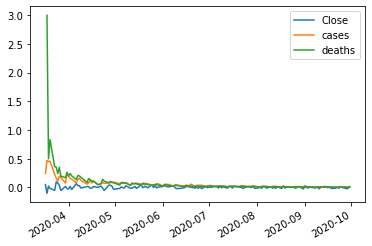

In [18]:
combined_Brazil_returns.plot()

In [20]:
brazil_correlation = combined_Brazil_returns.corr()

<AxesSubplot:>

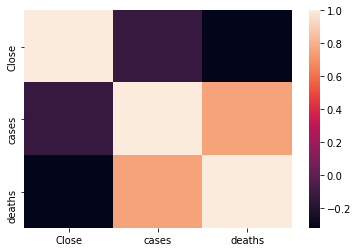

In [21]:
import seaborn as sns
sns.heatmap(brazil_correlation)
